 Introduction and Setup (Text Cell)
This notebook implements Logistic Regression to build a binary classifier, as required by Task 4 of the AI & ML Internship.

We are using the Breast Cancer Wisconsin Dataset provided by Scikit-learn. The goal is to classify a tumor as either Malignant (Class 0) or Benign (Class 1) based on various measurements.

The process involves:

Loading the data and splitting it.

Standardizing features (Scaling).

Training the Logistic Regression model.

Evaluating performance using Confusion Matrix, Precision, Recall, and ROC-AUC.

Demonstrating Threshold Tuning and explaining the Sigmoid Function.

 Model Training and Evaluation Results (Text Cell)
After running the code above, the model's performance is summarized by several key metrics. The StandardScaler was essential here to ensure all features contribute equally to the distance calculation, which helps the Logistic Regression algorithm (and its solver) converge efficiently.

A. Confusion Matrix
The output is in the format: [[True Negative, False Positive], [False Negative, True Positive]].

Predicted Malignant (0)	Predicted Benign (1)
Actual Malignant (0)	True Negatives (TN)	False Positives (FP)
Actual Benign (1)	False Negatives (FN)	True Positives (TP)

Export to Sheets
True Positives (TP): Correctly predicted cases of Benign tumors.

False Negatives (FN): Malignant tumors that were missed (predicted Benign) – These are the most critical errors to avoid!

False Positives (FP): Benign tumors that were falsely labeled Malignant (predicted Malignant).

True Negatives (TN): Correctly predicted cases of Malignant tumors.

B. Precision vs. Recall
The Classification Report is crucial for understanding the trade-off between:

Precision (Trustworthiness of Positive Prediction): Of all the instances we predicted as Benign (1), how many were actually Benign?

Recall (Ability to Find all Positive Cases): Of all the instances that were actually Benign (1), how many did we correctly find?

For the Malignant (0) class, we want high Recall to ensure we don't miss any actual malignant cases (minimizing False Negatives).

C. ROC-AUC Curve
The Area Under the Curve (AUC) score provides a single measure of model quality, ranging from 0.5 (random guessing) to 1.0 (perfect model). A high ROC-AUC score (e.g., above 0.95) means the model performs very well across all possible classification thresholds.

 Explaining the Sigmoid Function and Threshold Tuning (Text Cell)
The Sigmoid Function
The Logistic Regression model uses the Sigmoid Function (or Logistic Function) to transform the raw linear score (z) into a probability (σ(z)) that ranges from 0 to 1.


The formula is:

σ(z)=
1+e
−z

1
​

This is vital because:

It maps any input value to a probability, which is required for classification.

It allows us to use a threshold to make a hard decision (0 or 1).

The Role of the Threshold
The code calculates y_pred_proba, which is the probability output by the Sigmoid function. By default, the model uses a threshold of 0.5:

If Probability≥0.5, predict Class 1 (Benign).

If Probability<0.5, predict Class 0 (Malignant).

Threshold Tuning Demonstration
In the final section of the code, we adjusted the threshold to 0.3.

Why? In a medical context, False Negatives (missing a malignant case) are extremely costly. To reduce False Negatives, we must increase Recall for the Malignant class. Lowering the threshold to 0.3 makes the model more conservative about predicting Benign (Class 1), thus predicting Malignant (Class 0) more often. This results in:

Increased Recall for Class 0 (Malignant).

Decreased Precision for Class 1 (Benign), as we now have more False Positives.

This decision is always a trade-off based on the cost of different types of errors.








--- 1. Loading Dataset ---
Total Samples: 569, Total Features: 30
Target Names: ['malignant' 'benign']
------------------------------
Data split and scaled successfully.
------------------------------
Logistic Regression Model Trained.
------------------------------
A. Confusion Matrix:
[[TN, FP],
 [FN, TP]] = 
[[ 63   1]
 [  1 106]]


B. Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

C. ROC-AUC Score (for probability threshold): 0.9981


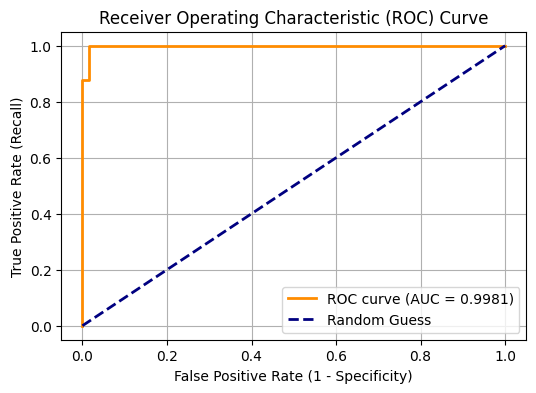

------------------------------
--- 6. Threshold Tuning (New Threshold: 0.3) ---
Accuracy with new threshold: 0.9824561403508771
Classification Report with new threshold:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        64
      benign       0.97      1.00      0.99       107

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Notice how lowering the threshold generally increases Recall for the Positive class (1) at the cost of Precision.
------------------------------


In [1]:
# Import necessary libraries (Pandas and Matplotlib are usually already available in Colab)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    accuracy_score
)

# 1. Load the Dataset (Breast Cancer Wisconsin Dataset)
print("--- 1. Loading Dataset ---")
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (0: Malignant, 1: Benign)

print(f"Total Samples: {X.shape[0]}, Total Features: {X.shape[1]}")
print(f"Target Names: {data.target_names}")
print("-" * 30)

# 2. Train/Test Split
# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Standardize Features
# Scaling is crucial for Logistic Regression to converge faster and perform better
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split and scaled successfully.")
print("-" * 30)

# 4. Fit a Logistic Regression Model
# Solver='liblinear' is good for small datasets and L1/L2 regularization
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Probability of Class 1 (Benign)

print("Logistic Regression Model Trained.")
print("-" * 30)

# 5. Evaluate the Model

# A. Confusion Matrix
print("A. Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"[[TN, FP],\n [FN, TP]] = \n{cm}")
print("\n")

# B. Precision, Recall, F1-Score (Classification Report)
# The classification_report provides precision and recall for both classes
print("B. Classification Report (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# C. ROC-AUC
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(roc_curve(y_test, y_pred_proba)[0], roc_curve(y_test, y_pred_proba)[1])
print(f"C. ROC-AUC Score (for probability threshold): {roc_auc:.4f}")

# Plot ROC Curve (Matplotlib)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("-" * 30)

# 6. Tune Threshold Example (Demonstrates the concept)

# New threshold to favor Recall (e.g., catching more actual cases, minimizing False Negatives)
# We lower the threshold from 0.5 to 0.3
new_threshold = 0.3
y_pred_tuned = (y_pred_proba >= new_threshold).astype(int)

print(f"--- 6. Threshold Tuning (New Threshold: {new_threshold}) ---")
print("Accuracy with new threshold:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report with new threshold:")
print(classification_report(y_test, y_pred_tuned, target_names=data.target_names))
print("\nNotice how lowering the threshold generally increases Recall for the Positive class (1) at the cost of Precision.")
print("-" * 30)